### Лабораторная работа 6 (Синтезатор частот)

In [233]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

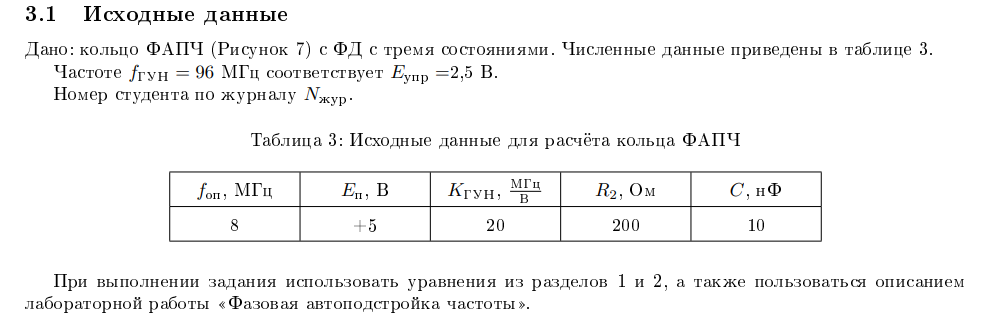
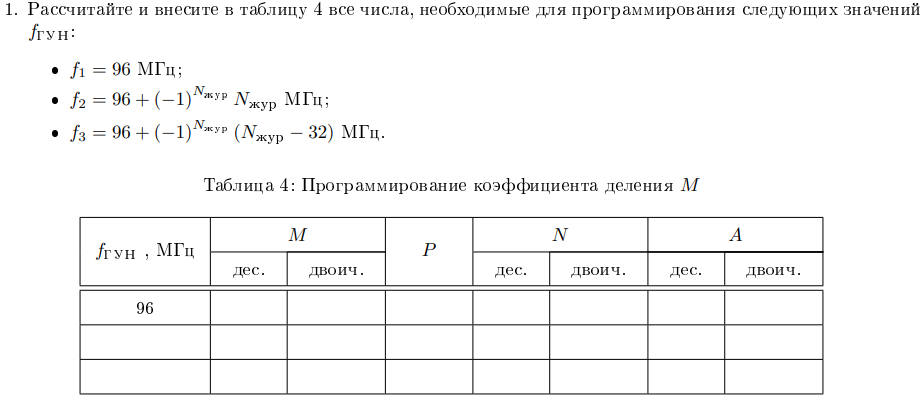

In [234]:
f_op = 8e6
E_p = 5
K_gun = 20 #(МГц/В)
R2 = 200 
C = 10e-9

f_gun1 = 96 # Мгц
f_gun2 = 96 + (-1)**15 * 15
f_gun3 = 96 + (-1)**15 * (15 - 32)

print(f'f_gun2 = {f_gun2}')
print(f'f_gun3 = {f_gun3}')


f_gun2 = 81
f_gun3 = 113


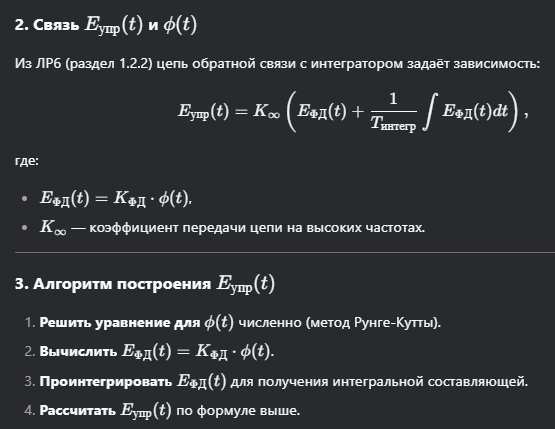

Функция cumtrapz из библиотеки SciPy в Python выполняет кумулятивное численное интегрирование методом трапеций. Она вычисляет интеграл от начала данных до каждой текущей точки, возвращая массив накопленных значений. Это полезно, когда нужно получить "историю" интеграла нарастающим итогом, а не только итоговое значение.

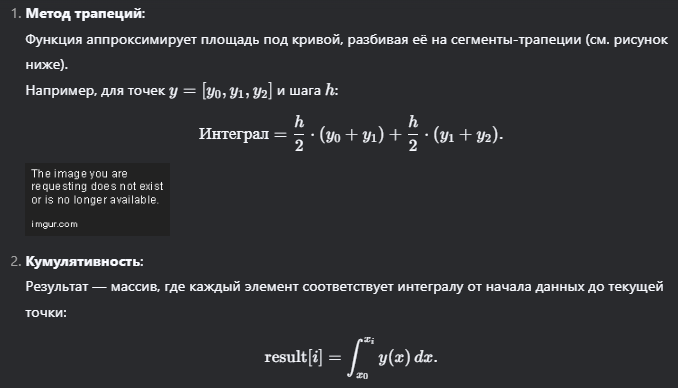

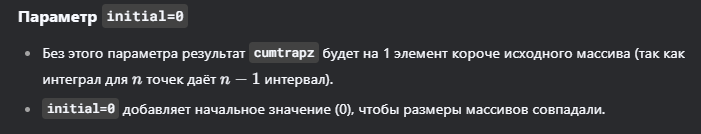

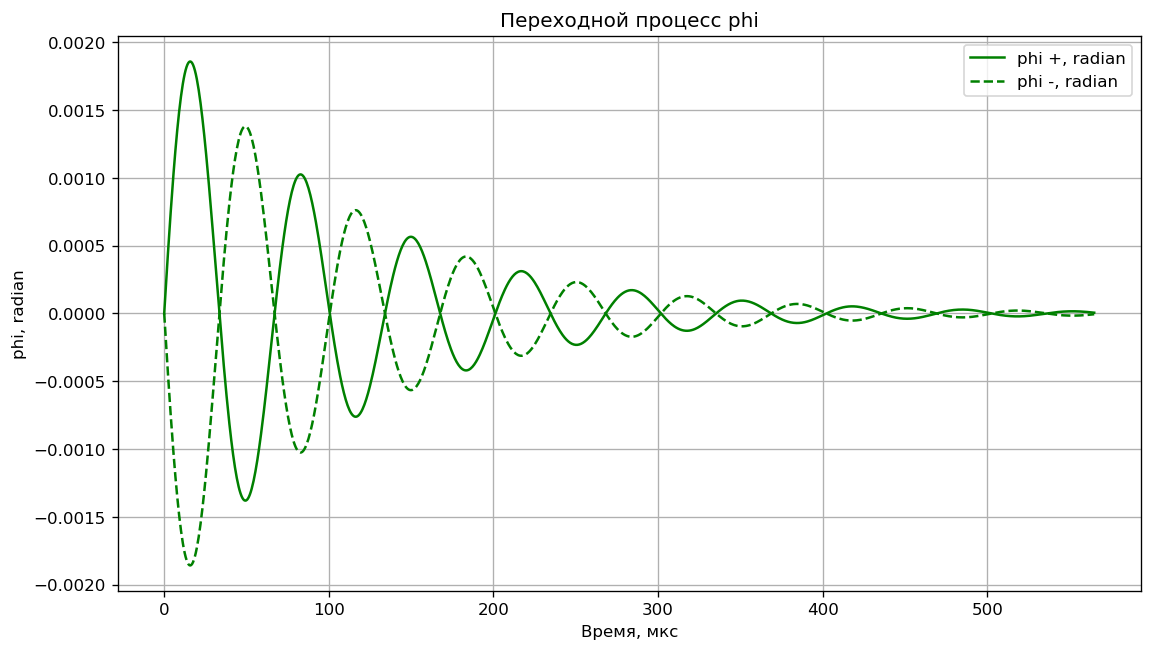

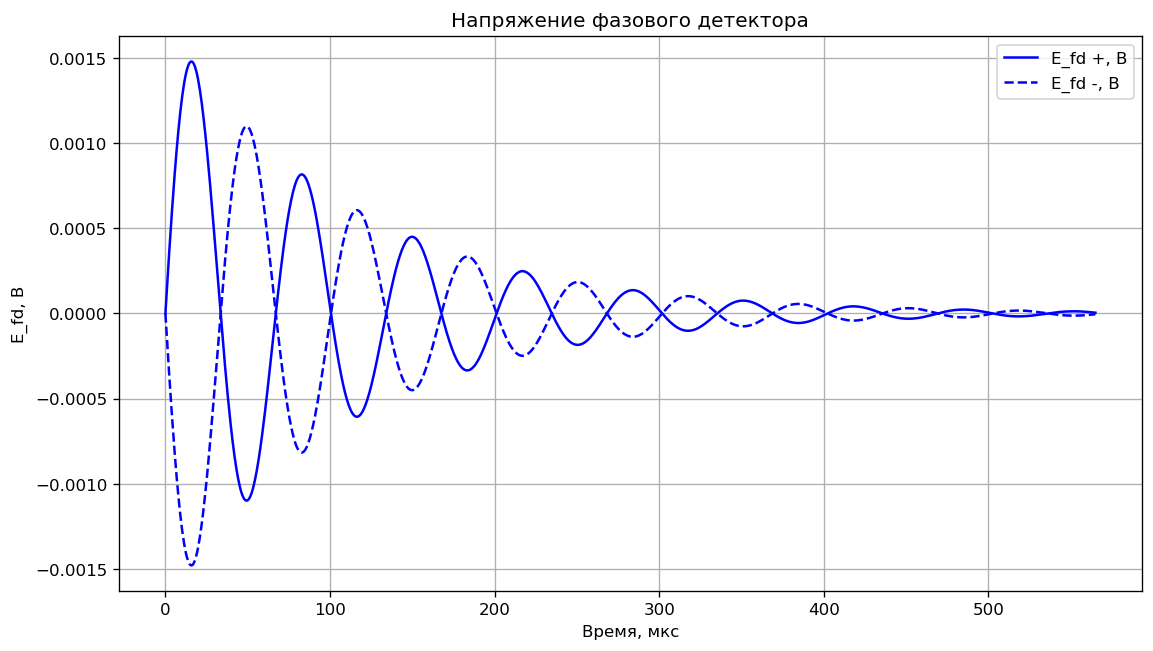

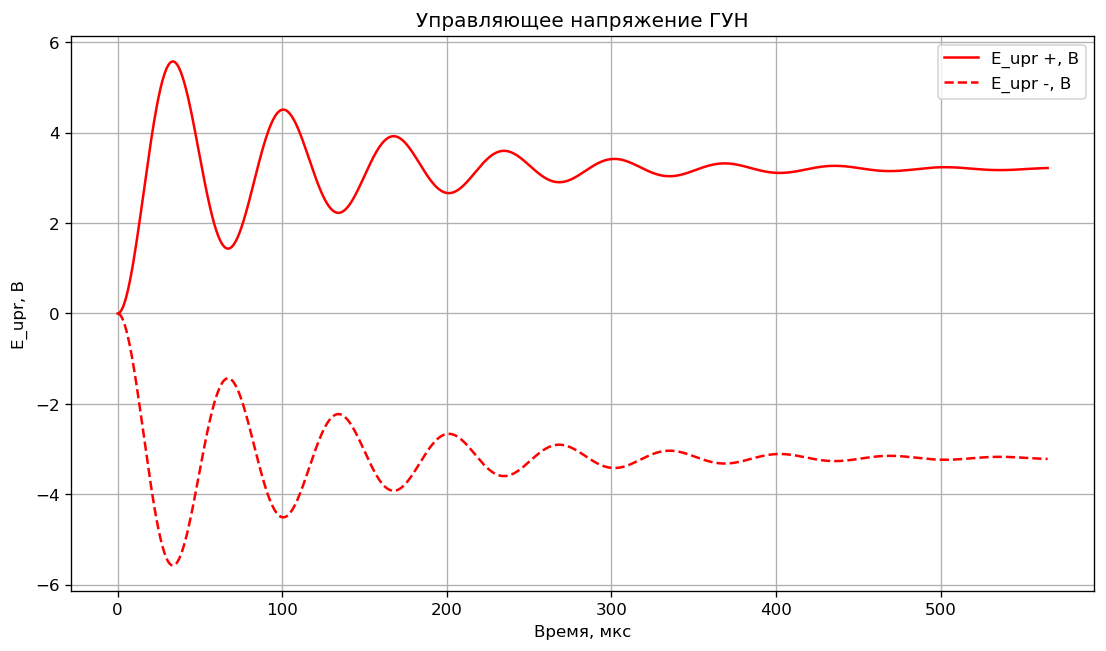

In [235]:
from scipy.integrate import solve_ivp, cumtrapz

# Параметры системы (пример)
# Параметры системы
R1 = 10000
R2 = 200
E_p = 5

K_fd = E_p / (2 * np.pi)

# Расчет T_integr
T_integr = 10e-9 * 200  # 2e-6 сек

T_fapch = 113 / (2 * np.pi * 20e6 * (R2 / R1) * K_fd)

K_infty = R2 / R1           # Коэффициент передачи цепи ОС

# Коэффициент sigma
sigma = T_fapch / T_integr


# Начальные условия (после скачка M)
phi0 = 0           # Начальная разность фаз
dphi0_1 = 64*np.pi * T_fapch              # Начальная производная
dphi0_2 = - 64*np.pi * T_fapch

# Система уравнений для φ(t)
def dydx(x, y):
    y1, y2 = y
    dy1dx = y2
    dy2dx = -y2 - sigma * y1
    return [dy1dx, dy2dx]

# Численное решение
x_span = (0, 10)         # Безразмерное время x
x_eval = np.linspace(0, 10, 1000)
sol_1 = solve_ivp(dydx, x_span, [phi0, dphi0_1], t_eval=x_eval, method='RK45')
sol_2 = solve_ivp(dydx, x_span, [phi0, dphi0_2], t_eval=x_eval, method='RK45')

# Вычисление E_ФД(t)
phi_1 = sol_1.y[0]
E_fd_1 = K_fd * phi_1

phi_2 = sol_2.y[0]
E_fd_2 = K_fd * phi_2

# Интеграл E_ФД(t)
integral_E_fd_1 = cumtrapz(E_fd_1, x=x_eval, initial=0)
integral_E_fd_2 = cumtrapz(E_fd_2, x=x_eval, initial=0)

# Вычисление E_упр(t)
E_upr_1 = K_infty * (E_fd_1 + (1 / T_integr) * integral_E_fd_1)
E_upr_2 = K_infty * (E_fd_2 + (1 / T_integr) * integral_E_fd_2)

# График E_ФД(t)

plt.figure(figsize=(11, 6), dpi=120)
plt.plot(sol_1.t * T_fapch*10**6, phi_1, color='green', label="phi +, radian")
plt.plot(sol_2.t * T_fapch*10**6, phi_2,linestyle = '--', color='green', label="phi -, radian")
plt.xlabel('Время, мкс')
plt.ylabel("phi, radian")
plt.title('Переходной процесс phi')
plt.grid(True)
plt.legend()

plt.figure(figsize=(11, 6), dpi=120)
plt.plot(sol_1.t * T_fapch*10**6, E_fd_1, color='blue', label="E_fd +, В")
plt.plot(sol_2.t * T_fapch*10**6, E_fd_2, color='blue', linestyle = '--', label="E_fd -, В")
plt.xlabel('Время, мкс')
plt.ylabel("E_fd, В")
plt.title('Напряжение фазового детектора')
plt.grid(True)
plt.legend()

# График E_упр(t)
plt.figure(figsize=(11, 6), dpi=120)
plt.plot(sol_1.t * T_fapch*10**6, E_upr_1, color='red', label="E_upr +, В")
plt.plot(sol_2.t * T_fapch*10**6, E_upr_2, linestyle = '--', color='red', label="E_upr -, В")
plt.xlabel('Время, мкс')
plt.ylabel("E_upr, В")
plt.title('Управляющее напряжение ГУН')
plt.grid(True)
plt.legend()
plt.show()

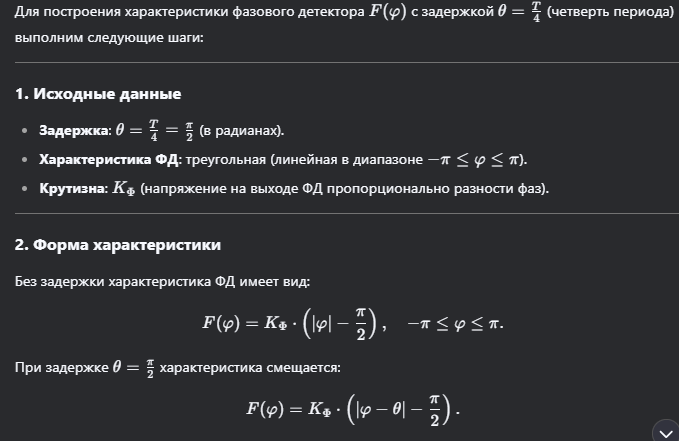
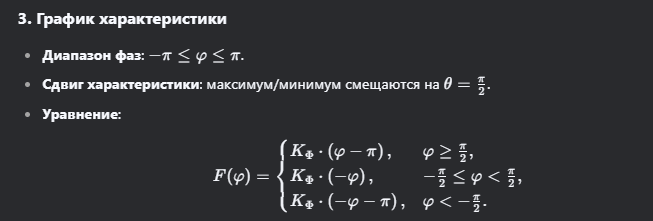

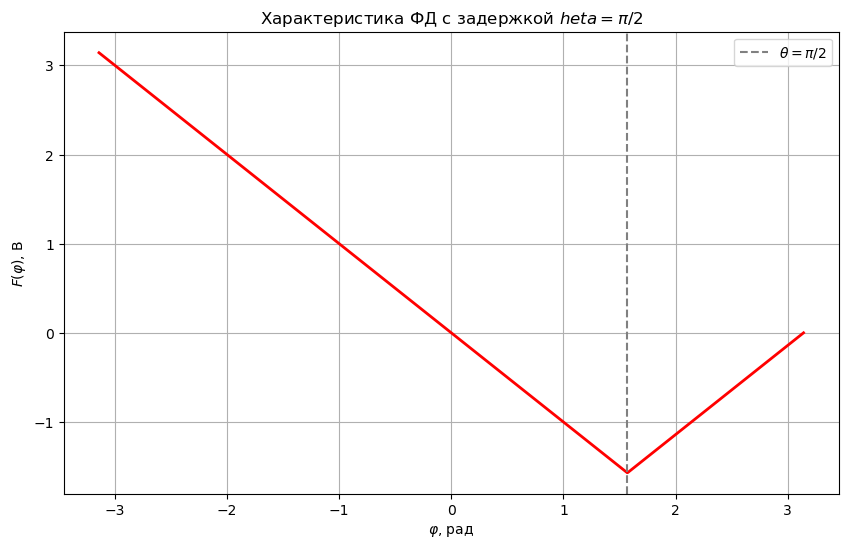

In [236]:
K_fd = 1.0  # Крутизна характеристики (пример)
theta = np.pi / 2  # Задержка

phi = np.linspace(-np.pi, np.pi, 1000)
F_phi = K_fd * (np.abs(phi - theta) - np.pi/2)

plt.figure(figsize=(10, 6))
plt.plot(phi, F_phi, color='red', linewidth=2)
plt.xlabel(r'$\varphi$, рад')
plt.ylabel(r'$F(\varphi)$, В')
plt.title('Характеристика ФД с задержкой $\theta = \pi/2$')
plt.axvline(x=theta, color='gray', linestyle='--', label=r'$\theta = \pi/2$')
plt.grid(True)
plt.legend()
plt.show()

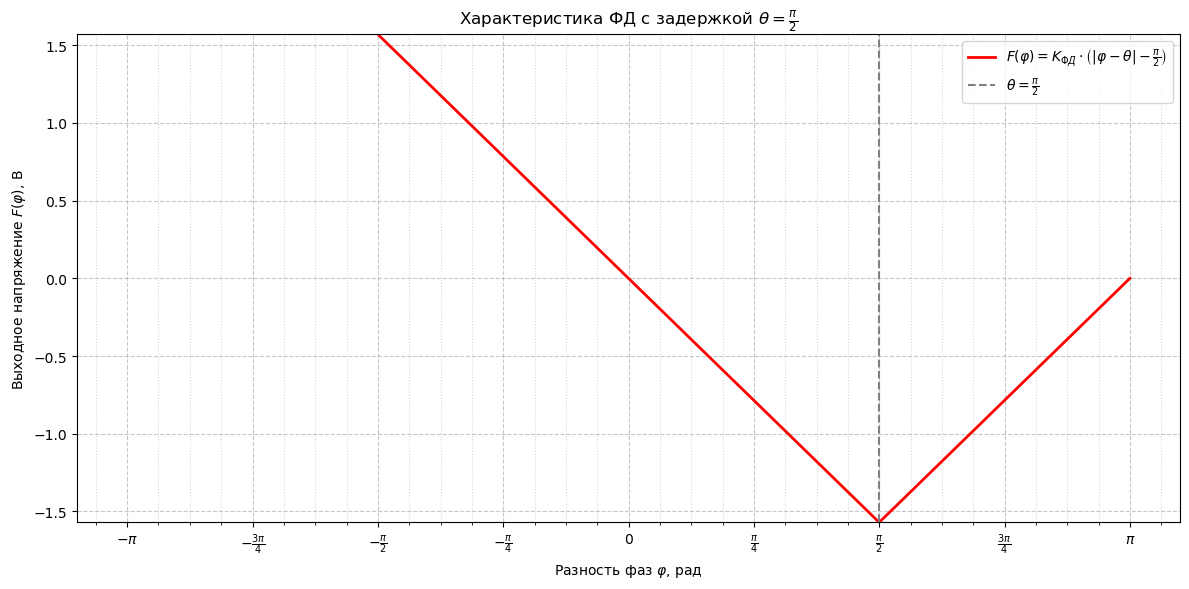

In [237]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Параметры характеристики
K_fd = 1.0
theta = np.pi/2  # Задержка в четверть периода (T/4)

# Создание массива фаз
phi = np.linspace(-np.pi, np.pi, 1000)
F_phi = K_fd * (np.abs(phi - theta) - np.pi/2)

# Настройка графика
plt.figure(figsize=(12, 6))
plt.plot(phi, F_phi, color='red', linewidth=2, label=r'$F(\varphi) = K_{\Phi Д} \cdot \left(|\varphi - \theta| - \frac{\pi}{2}\right)$')

# Настройка сетки с шагом π/4
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(np.pi/4))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(np.pi/16))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.grid(which='major', linestyle='--', alpha=0.7)
ax.grid(which='minor', linestyle=':', alpha=0.5)

# Форматирование подписей оси X в терминах π
def format_func(value, tick_number):
    fractions = {
        0: "0",
        np.pi/4: r"$\frac{\pi}{4}$",
        np.pi/2: r"$\frac{\pi}{2}$",
        3*np.pi/4: r"$\frac{3\pi}{4}$",
        np.pi: r"$\pi$",
        -np.pi: r"$-\pi$",
        -3*np.pi/4: r"$-\frac{3\pi}{4}$",
        -np.pi/2: r"$-\frac{\pi}{2}$",
        -np.pi/4: r"$-\frac{\pi}{4}$"
    }
    return fractions.get(value, "")

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Подписи и оформление
plt.xlabel(r'Разность фаз $\varphi$, рад')
plt.ylabel(r'Выходное напряжение $F(\varphi)$, В')
plt.title(r'Характеристика ФД с задержкой $\theta = \frac{\pi}{2}$')
plt.axvline(x=theta, color='gray', linestyle='--', label=r'$\theta = \frac{\pi}{2}$')
plt.legend()
plt.ylim(-np.pi/2,np.pi/2)
plt.tight_layout()
plt.show()